In [58]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.collection_of_experiments import CollectionOfExperiments
from helpers.plot_helpers import *
from helpers.computational_tools import remesh, select_LatLon, Lk_error, x_coord, y_coord, gaussian_remesh
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean
import os
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
import hvplot.xarray
import hvplot
hvplot.output(widget_location='bottom')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
ds = CollectionOfExperiments.init_folder('/scratch/pp2681/mom6/Feb2022/bare', additional_subfolder='output')

# Reading filtered experiment

In [16]:
FGR=2.5
ds.remesh('R64', 'R4', f'R64_R4_FGR{FGR}', operator= lambda x,y: gaussian_remesh(x,y,FGR=FGR))
for file in [f'/scratch/pp2681/mom6/R64_R4_FGR{FGR}-part1.nc', f'/scratch/pp2681/mom6/R64_R4_FGR{FGR}-part2.nc']:
    dataset = xr.open_dataset(file, decode_times=False)
    for key in dataset.keys():
        setattr(ds[f'R64_R4_FGR{FGR}'], key, dataset[key])

Experiment R64 coarsegrained to R4 is created. Its identificator=R64_R4_FGR2.5


In [32]:
ds += CollectionOfExperiments.init_folder('/scratch/nl2631/mom6/double_gyre')

In [33]:
setattr(ds['R32_fac8_gaussian_vector'], 'param', xr.open_dataset('/scratch/nl2631/mom6/double_gyre/R32_fac8_gaussian_vector/ocean_geometry.nc'))

In [34]:
setattr(ds['R32_fac8_gaussian_vector'], 'RV', ds['R32_fac8_gaussian_vector'].param.Coriolis)

In [35]:
ds += CollectionOfExperiments.init_folder('/scratch/nl2631/mom6/double_gyre', prefix='corrected')

In [36]:
setattr(ds['corrected-R32_fac8_gaussian_vector'], 'param', ds['R4'].param)

In [40]:
setattr(ds['corrected-R32_fac8_gaussian_vector'], 'u', remesh(ds['R32_fac8_gaussian_vector'].u, ds['R4'].u))

In [41]:
setattr(ds['corrected-R32_fac8_gaussian_vector'], 'v', remesh(ds['R32_fac8_gaussian_vector'].v, ds['R4'].v))

In [42]:
setattr(ds['corrected-R32_fac8_gaussian_vector'], 'h', remesh(ds['R32_fac8_gaussian_vector'].h, ds['R4'].h))

In [45]:
setattr(ds['corrected-R32_fac8_gaussian_vector'], 'RV', ds['corrected-R32_fac8_gaussian_vector'].param.f)

Text(0.5, 1.0, 'Same ZB offline but on your data \n with corrected staggering')

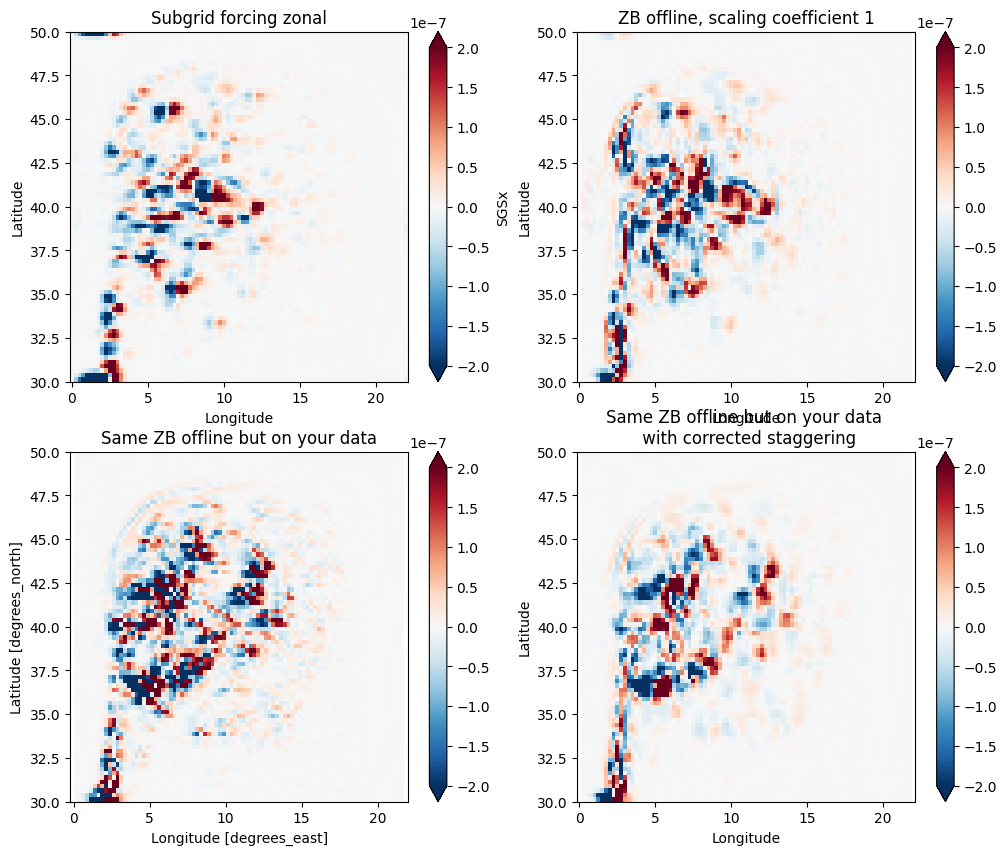

In [48]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
ds['R64_R4_FGR2.5'].SGSx.isel(Time=-1,zl=0).plot(vmin=-2e-7, vmax=2e-7, cmap='RdBu_r')
plt.title('Subgrid forcing zonal')
plt.subplot(2,2,2)
ds['R64_R4_FGR2.5'].ZB_offline(amplitude=1)[0].isel(Time=-1, zl=0).plot(vmin=-2e-7, vmax=2e-7, cmap='RdBu_r')
plt.title('ZB offline, scaling coefficient 1')
plt.subplot(2,2,3)
ds['R32_fac8_gaussian_vector'].ZB_offline(amplitude=1)[0].isel(Time=-1, zl=0).plot(vmin=-2e-7, vmax=2e-7, cmap='RdBu_r')
plt.title('Same ZB offline but on your data')
plt.subplot(2,2,4)
ds['corrected-R32_fac8_gaussian_vector'].ZB_offline(amplitude=1)[0].isel(Time=-1, zl=0).plot(vmin=-2e-7, vmax=2e-7, cmap='RdBu_r')
plt.title('Same ZB offline but on your data \n with corrected staggering')